# Author : Shivani Singh

## Task 2 : Prediction Using Decision Tree Algorithm

### GRIP @ The Sparks Foundation

## LOGISTIC REGRESSION

 This task helps us understanding the working of decision trees.

#### Step 1 : Importing all the libraries required in this notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2 : Reading data

In [2]:
iris_data = pd.read_csv('iris.csv')

In [3]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### Step 3 : Exploratory Data Analysis

In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
iris_data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

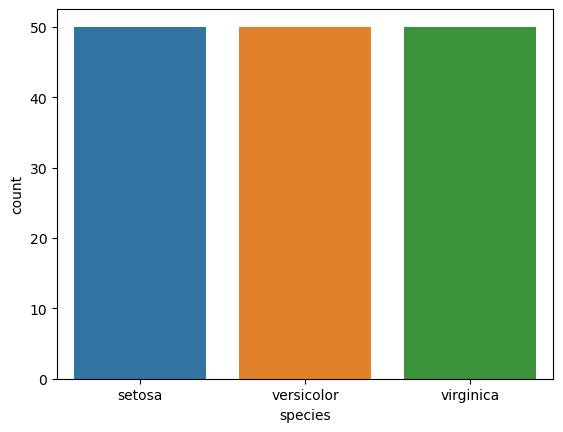

In [8]:
sns.countplot(data=iris_data,x='species')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

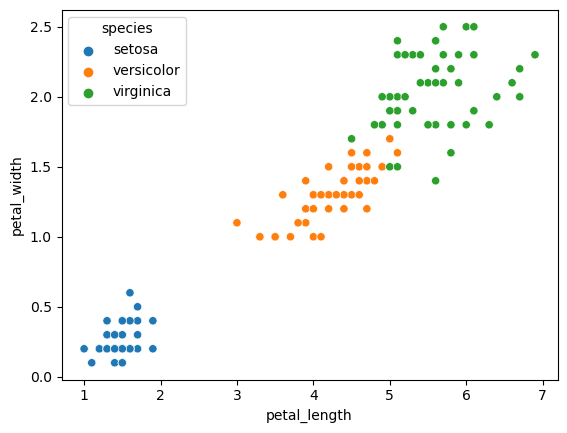

In [9]:
sns.scatterplot(data=iris_data,x='petal_length',y='petal_width',hue='species')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

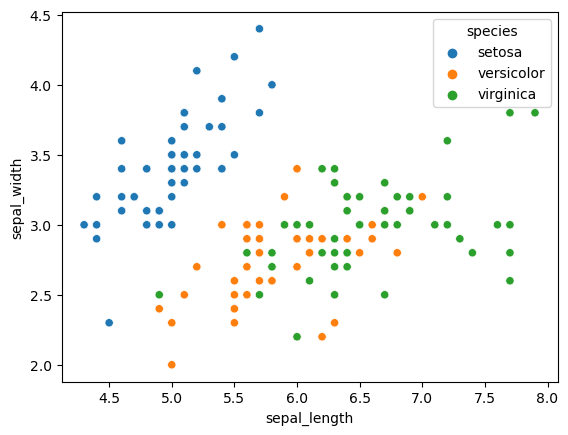

In [10]:
sns.scatterplot(data=iris_data,x='sepal_length',y='sepal_width',hue='species')

#### Step 4 : Preparing Data for Model Training

In [11]:
X = iris_data.drop('species',axis=1)

In [12]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y = iris_data['species']

In [14]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

#### Step 5 : Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
model = DecisionTreeClassifier()

In [19]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

#### Step 6 : Making Prediction based on test data  (Testing the Model)

In [20]:
base_pred = model.predict(X_test)

In [21]:
base_pred

array(['setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor'], dtype=object)

#### Step 7 : Performance Evaluation

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [23]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.95      0.95      0.95        20
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



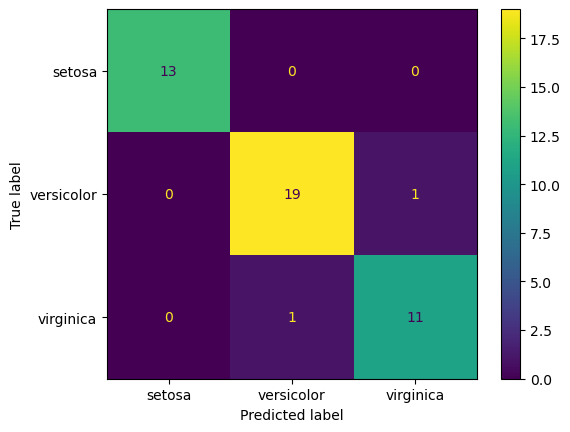

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test,base_pred)

#### Step 8 : Let us visualize the Decision Tree to understand it better.

In [25]:
from sklearn.tree import plot_tree

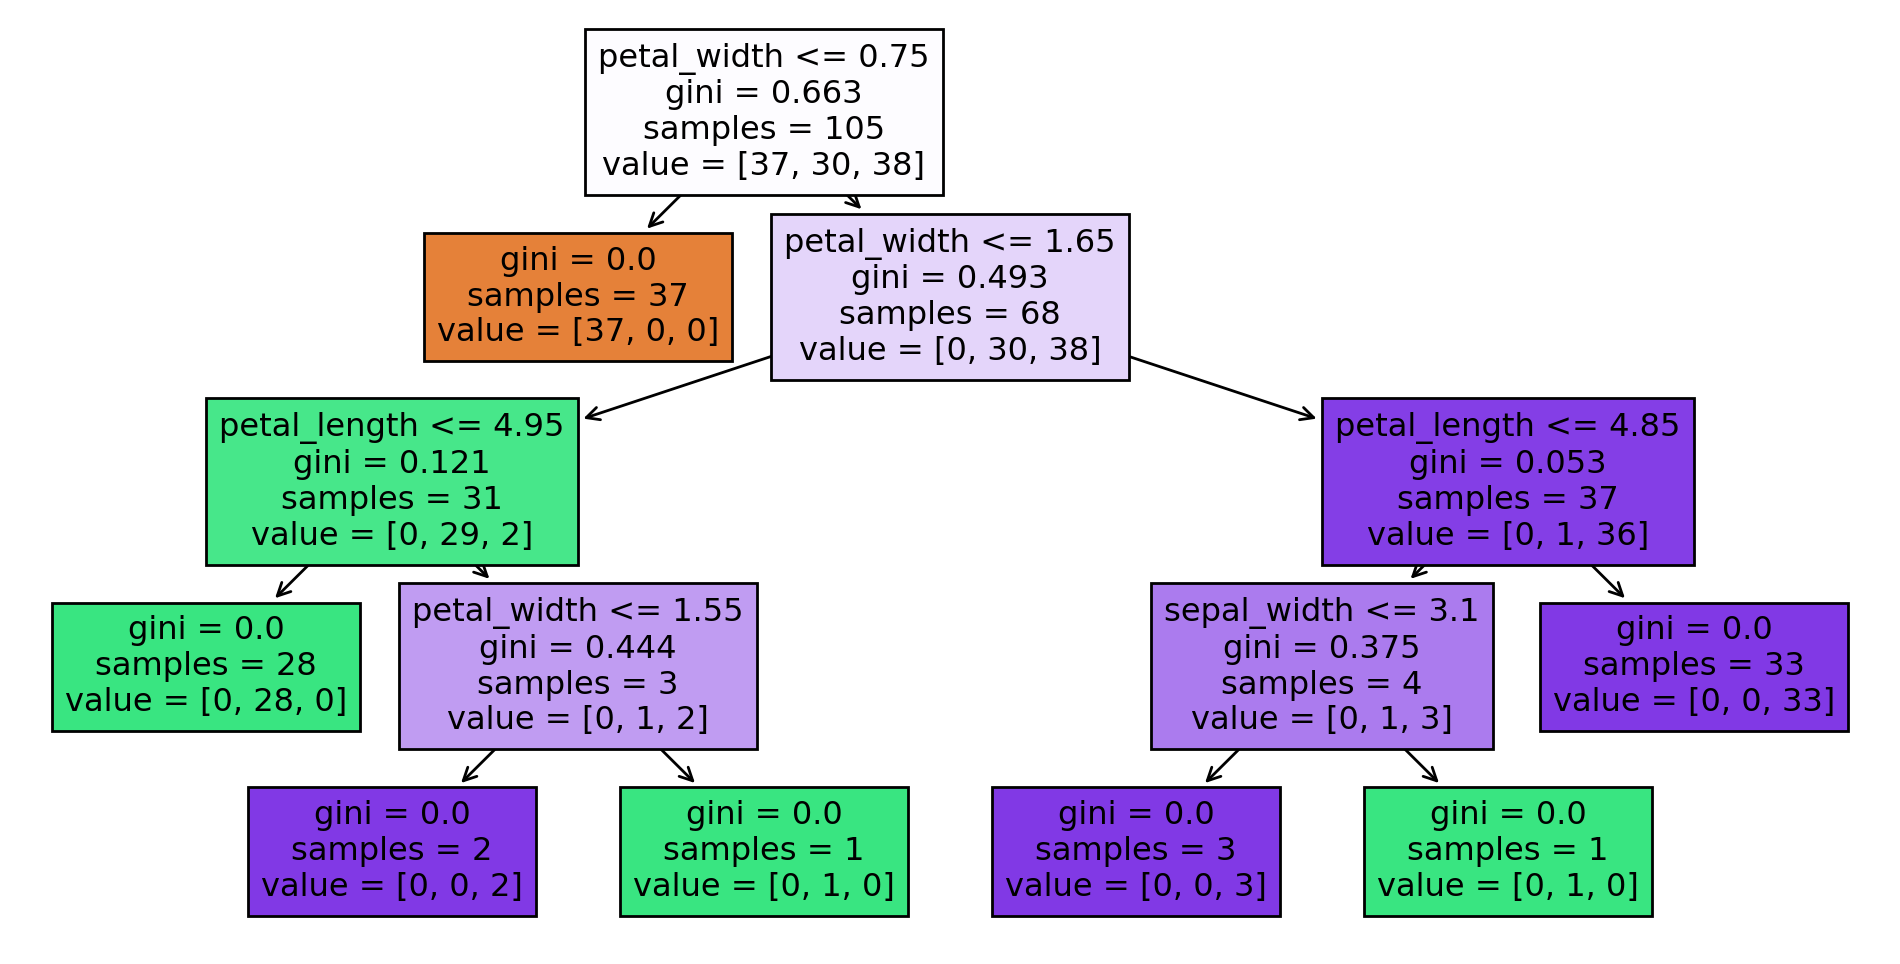

In [26]:
plt.figure(figsize=(12,6),dpi=200)
plot_tree(model,feature_names=X.columns,filled=True);

**we can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.**